# Wildflower Project - Test with my photos - season2 (FINAL)

Test both Model A & Model B in `wildflower_evaluation-season2-final.ipynb` with some my photos 


In [1]:
import os

SEED_VALUE = 47
os.environ['PYTHONHASHSEED']=str(SEED_VALUE)

import random
random.seed(SEED_VALUE)

import numpy as np
np.random.seed(SEED_VALUE)

import tensorflow as tf
tf.random.set_seed(SEED_VALUE)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
%matplotlib notebook

#import os
#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import decode_predictions, preprocess_input
import matplotlib.pyplot as plt
#import numpy as np

np.set_printoptions(suppress=True) # Avoid scientific notation (1.500e-4)

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.2.0


In [3]:
tf.config.list_physical_devices('GPU')


[]

In [4]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [5]:
# Model A
model_a = load_model("wfmodel_s2_ft_final.h5")

model_a.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328

In [6]:
# Model B
model_b = load_model("wfmodel3_s2_5b_ft_final.h5")

model_b.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328

## Example to test new images
ref: https://keras.io/examples/vision/image_classification_from_scratch/

img = keras.preprocessing.image.load_img(
    "PetImages/Cat/6779.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

In [7]:
import os

images = os.listdir('testimages_s2')
print(images)

['Kennedia_prostrata.JPG', 'Grevillea-red.JPG', 'schoenia_cassiniana.JPG', 'chamelaucium_uncinatum.JPG', 'lechenaultia_macrantha.JPG', 'dampiera_wellsiana.JPG', 'kangaroo_paw-3.JPG', 'Banksia.JPG', 'hibbertia_hypericoides.JPG', 'verticordia_grandis.JPG', 'burchardia_congesta.JPG', 'Caladenia_deformis.JPG', 'conospermum_stoechadis.JPG', 'Drosera_macrantha-2.jpg', 'Alyogyne_huegelii.JPG', 'Hibbertia_hypericoides-2.jpg', 'Bossiaea_eriocarpa.jpg', 'rhodanthe_chlorocephala_rosea.JPG', 'Flowering_gum-red.JPG', 'schoenia_cassiniana-3.JPG', 'kangaroo_paw-2.JPG', 'Eucalyptus_macrocarpa.JPG', 'Flowering_gum-white.JPG', 'Hardenbergia_comptoniana.JPG', 'Xanthorrhoea_preissii.JPG', 'hypocalymma_robustum.JPG', 'thomasia_grandiflora.JPG']


In [8]:
img = load_img('testimages_s2/Alyogyne_huegelii.JPG', target_size=(224, 224))
img_array = img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
img_preprocessed = preprocess_input(img_array)
img_preprocessed.shape


TensorShape([1, 224, 224, 3])

In [9]:
pred_a = model_a.predict(img_preprocessed)

In [10]:
class_list = os.listdir('wf_data2/train')
class_list = sorted(class_list)

In [11]:
def decode_prediction(prediction, thr=0.9, top=5):
    ''' prediction: A 1D array of prediction (size = NUMBER OF CLASSES)
        thr: Report all classes which make up the proportion specified by this parameter.
             (i.e. thr=0.8 & classA=0.5/classB=0.2/classC=0.15/classD=0.1/classE=0.05 --> Report A,B,C )
             None: Report all or follow the `top` parameter.
        top: Report Top N rank classes. None: Report all classes as long as the condition meets `thr` parameter.
    '''
        
    top_n = np.argsort(prediction)[::-1][:top]
    
    list_pred = [] #(index, class_name, probability)
    
    pred_sum = 0
    for n in top_n:
        pred_sum += prediction[n]
        list_pred.append((n, class_list[n], prediction[n]))
        if pred_sum >= thr:
            break
        
    return(list_pred)
    

In [12]:
print(decode_prediction(np.squeeze(pred_a)))

[(1, 'Alyogyne_huegelii', 0.9999968)]


In [13]:
def plot_results(results, max_top=3):
    '''result: list of tuple (test image path, [list of prediction (return of `decode_prediction())])'''
    
    _row = len(results)
    _col = max_top + 1
    
    fig, axs = plt.subplots(ncols=_col, nrows=_row, figsize=(10, _row*1.5))
    
    for i in range(_row):
        imagepath = results[i][0]
        img = load_img(imagepath)
        img = img_to_array(img)
        img /= 255.
        
        axs[i, 0].imshow(img)
        axs[i, 0].set_xticks([])
        axs[i, 0].set_yticks([])
        axs[i, 0].set_title(os.path.basename(imagepath), fontdict={'fontsize' : 'small'})
        
        pred_list = results[i][1]
        
        for j in range(max_top):
            
            if j >= len(pred_list):
                axs[i, j+1].set_xticks([])
                axs[i, j+1].set_yticks([])
                continue
                
            (class_index, class_name, prob) = pred_list[j]
            class_path = os.path.join('wf_data2/train', class_name)
            class_imgfile = os.listdir(class_path)[0]
            class_img = load_img(os.path.join(class_path, class_imgfile))
            class_img = img_to_array(class_img)
            class_img /= 255.
            
            axs[i, j+1].imshow(class_img)
            axs[i, j+1].set_xticks([])
            axs[i, j+1].set_yticks([])
            axs[i, j+1].set_title("{}:{:.4f}".format(class_name, prob), fontdict={'fontsize' : 'small'})
            
            #if j + 1 >= len(pred_list):
            #    break

    fig.tight_layout()
    return fig

## Model A

In [14]:
result_list_a = []

for image in images:
    imagepath = os.path.join('testimages_s2', image)
    img = load_img(imagepath, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_preprocessed = preprocess_input(img_array)
    
    pred = model_a.predict(img_preprocessed)
    
    result = decode_prediction(np.squeeze(pred))
    result_list_a.append((imagepath, result))
    

<IPython.core.display.Javascript object>


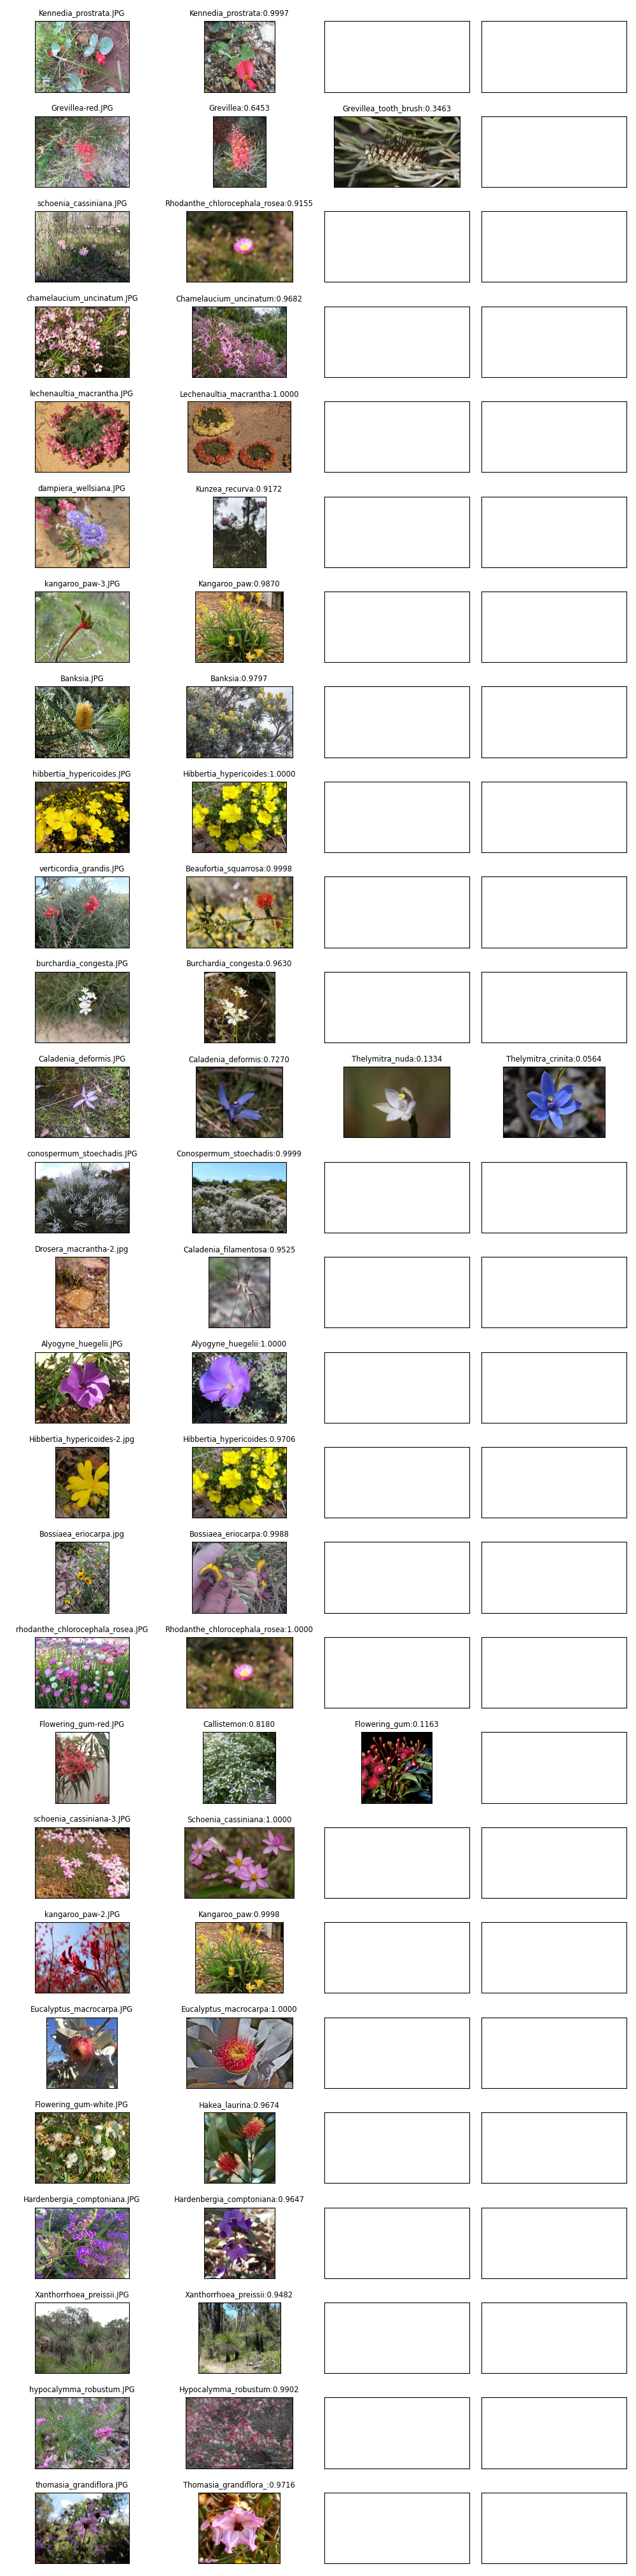

In [15]:
fig = plot_results(result_list_a)
plt.show()

In [16]:
len(result_list_a)

27

In [17]:
fig.savefig('myimages_modelA_s2.jpg')

In [18]:
result_list_b = []

for image in images:
    imagepath = os.path.join('testimages_s2', image)
    img = load_img(imagepath, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_preprocessed = preprocess_input(img_array)
    
    pred = model_b.predict(img_preprocessed)
    
    result = decode_prediction(np.squeeze(pred))
    result_list_b.append((imagepath, result))
    

<IPython.core.display.Javascript object>


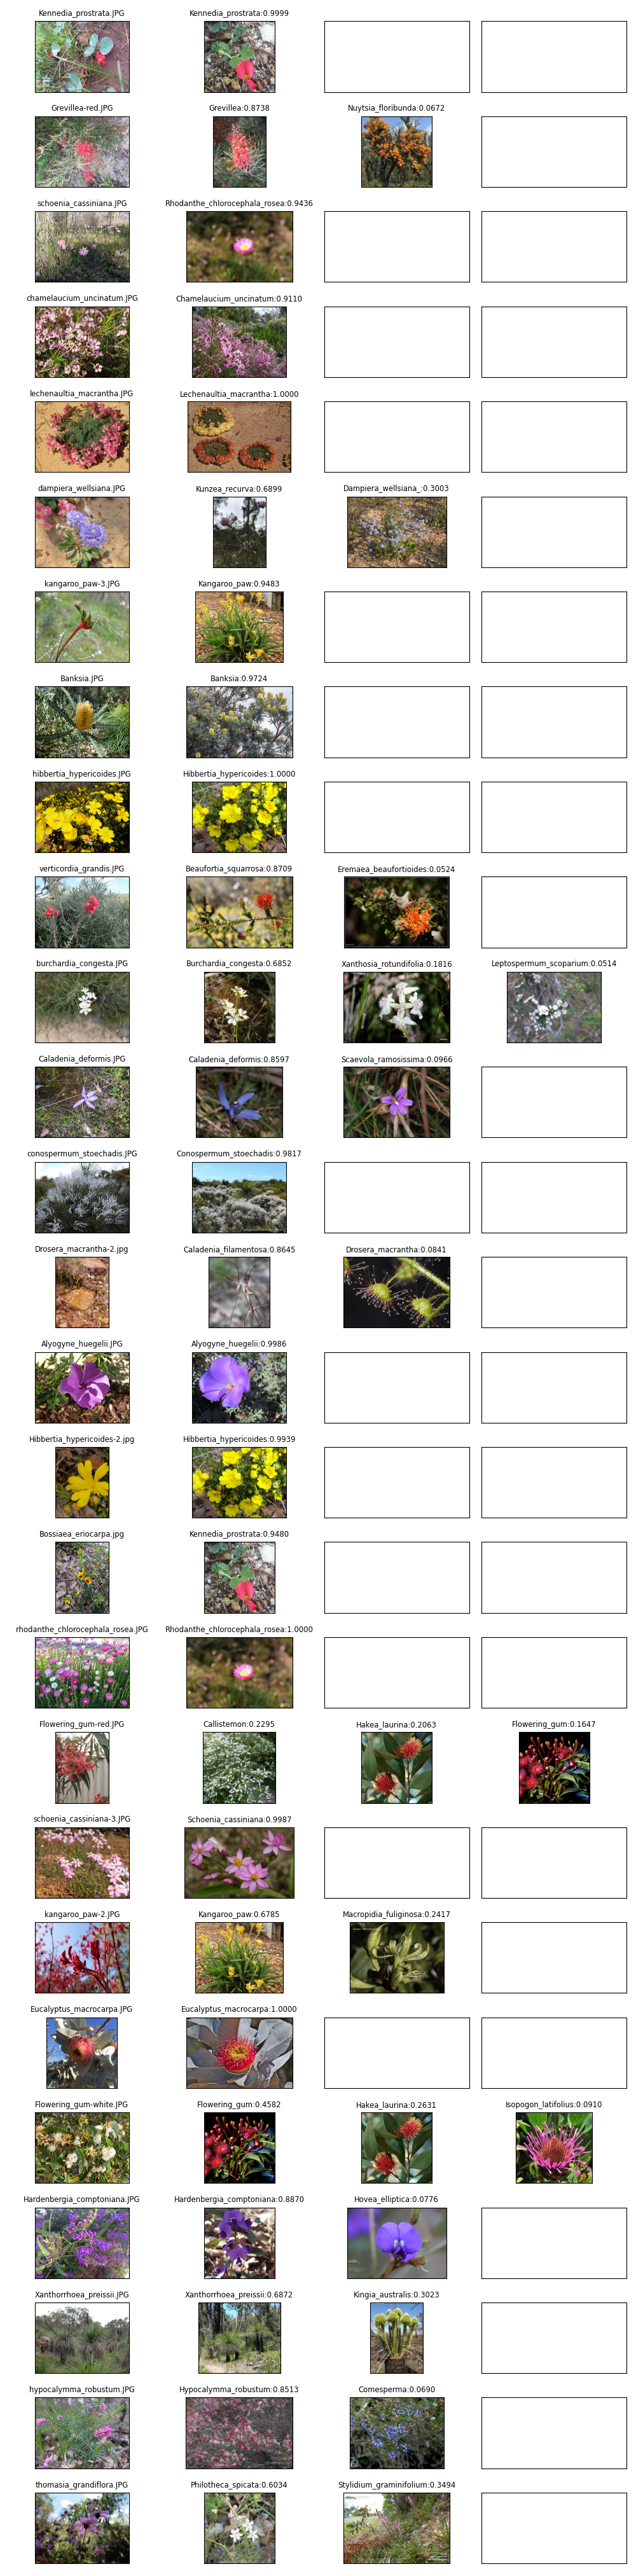

In [19]:
fig2 = plot_results(result_list_b)
plt.show()

In [20]:
fig2.savefig('myimages_modelB_s2.jpg')

In [21]:
class_list_lower = [cl.lower().rstrip('_') for cl in class_list]

In [22]:
def calc_matched_class(result_list_x):

    class_exist = 0
    class_matched = 0

    for res in result_list_x:
        image_name = os.path.basename(res[0])
        image_name = image_name.lower()
        image_name = image_name.split('.')[0]
        image_name = image_name.split('-')[0]
        #print(image_name)

        matched_class = "---"
        if image_name in class_list_lower:
            matched_class = image_name
            class_exist += 1

        image_name_print = "{} ({}) :".format(image_name, matched_class)
        result_pred = res[1]

        pred_classes = ""
        for rp in result_pred:
            pred_name = rp[1]
            matched = ""
            if pred_name.lower().rstrip('_') == image_name:
                matched = "*"
                class_matched += 1

            pred_classes = "{} {}{}".format(pred_classes, pred_name, matched)

        print("{}{}".format(image_name_print, pred_classes))

    print("-----------")
    print("All images = {}".format(len(result_list_x)))
    print("Exists in data = {}".format(class_exist))
    print("Matched with data = {}".format(class_matched))
    print("Matched / Exists = {:.2f}%".format(class_matched / class_exist * 100))

In [23]:
calc_matched_class(result_list_a)

kennedia_prostrata (kennedia_prostrata) : Kennedia_prostrata*
grevillea (grevillea) : Grevillea* Grevillea_tooth_brush
schoenia_cassiniana (schoenia_cassiniana) : Rhodanthe_chlorocephala_rosea
chamelaucium_uncinatum (chamelaucium_uncinatum) : Chamelaucium_uncinatum*
lechenaultia_macrantha (lechenaultia_macrantha) : Lechenaultia_macrantha*
dampiera_wellsiana (dampiera_wellsiana) : Kunzea_recurva
kangaroo_paw (kangaroo_paw) : Kangaroo_paw*
banksia (banksia) : Banksia*
hibbertia_hypericoides (hibbertia_hypericoides) : Hibbertia_hypericoides*
verticordia_grandis (verticordia_grandis) : Beaufortia_squarrosa
burchardia_congesta (burchardia_congesta) : Burchardia_congesta*
caladenia_deformis (caladenia_deformis) : Caladenia_deformis* Thelymitra_nuda Thelymitra_crinita
conospermum_stoechadis (conospermum_stoechadis) : Conospermum_stoechadis*
drosera_macrantha (drosera_macrantha) : Caladenia_filamentosa
alyogyne_huegelii (alyogyne_huegelii) : Alyogyne_huegelii*
hibbertia_hypericoides (hibbertia

In [24]:
calc_matched_class(result_list_b)

kennedia_prostrata (kennedia_prostrata) : Kennedia_prostrata*
grevillea (grevillea) : Grevillea* Nuytsia_floribunda
schoenia_cassiniana (schoenia_cassiniana) : Rhodanthe_chlorocephala_rosea
chamelaucium_uncinatum (chamelaucium_uncinatum) : Chamelaucium_uncinatum*
lechenaultia_macrantha (lechenaultia_macrantha) : Lechenaultia_macrantha*
dampiera_wellsiana (dampiera_wellsiana) : Kunzea_recurva Dampiera_wellsiana_*
kangaroo_paw (kangaroo_paw) : Kangaroo_paw*
banksia (banksia) : Banksia*
hibbertia_hypericoides (hibbertia_hypericoides) : Hibbertia_hypericoides*
verticordia_grandis (verticordia_grandis) : Beaufortia_squarrosa Eremaea_beaufortioides
burchardia_congesta (burchardia_congesta) : Burchardia_congesta* Xanthosia_rotundifolia Leptospermum_scoparium
caladenia_deformis (caladenia_deformis) : Caladenia_deformis* Scaevola_ramosissima
conospermum_stoechadis (conospermum_stoechadis) : Conospermum_stoechadis*
drosera_macrantha (drosera_macrantha) : Caladenia_filamentosa Drosera_macrantha*


**NOTE:**
According to the calculation, Model A and Model B performs to the same level. However, they both have particular classes they are good at detecting; one has some classes it performs better than the other, and the other do better than the counterpart with some another classes.

It's difficult for me to choose the best model from those two..., but at least there are classes both models are able to detect with high confidence and with constant success. It is good.

For further improvement, I will be able to raise the accuracy by adding more data and train again. Also it might make it more successful when I categorise the flowers based on the colour on top of the species/genus, because colors seem to be a large impact on the model's classification. This might be effective especially for the classes that are categorised as Genus (that contains a variety of species), rather than for the classes that consist of only one Species.

i.e.

- flowering gum
- grevillea
- bottle brush
- wattle

